# Identifying Signal and Noise Using ICA
*Written by Luke Chang*

In this lab we will explore using ICA to examine different signals in our data that may correspond to actual signal or noise.  This notebook is currently still a work in progress. 

In [1]:
%matplotlib inline

import os
import glob
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.data import Brain_Data, Adjacency
from nltools.simulator import Simulator
from nltools.mask import create_sphere
from nltools.stats import align
from nltools.datasets import fetch_localizer

base_dir = '/Users/lukechang/Dropbox/Dartmouth/Teaching/Psych60_HumanBrainImaging/2019S/Homework/5_Preprocessing'


/Users/lukechang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lukechang/anaconda3/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
/Users/lukechang/anaconda3/lib/python3.7/site-packages/networkx/classes/reportviews.py:95: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable


In [13]:
sub_ids = ['S%02d' % x for x in np.arange(1,2)]
f = fetch_localizer(subject_ids=sub_ids, get_anats=False, data_type='preprocessed')


Downloaded 1555 of 1555 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 64001 of 64001 bytes (100.0%,    0.0s remaining) ...done. (4 seconds, 0 min)


In [22]:
print(f.keys())
print(f['functional'])


assert isinstance(f['functional'], list)
assert f['structural'] is None
assert isinstance(f['ext_vars'], pd.DataFrame)

dict_keys(['functional', 'structural', 'ext_vars', 'description'])
[['/Users/lukechang/nilearn_data/brainomics_localizer/brainomics_data/S01/preprocessed_fMRI_bold.nii.gz']]


In [11]:
epi = nib.load('/Users/lukechang/nilearn_data/brainomics_localizer/brainomics_data/S01/preprocessed_fMRI_bold.nii.gz')
epi.data = np.squeeze(epi.get_data())
data = Brain_Data(epi)

/Users/lukechang/anaconda3/lib/python3.7/site-packages/nilearn-0.5.0-py3.7.egg/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


To perform an ICA on your data it is useful to first run a PCA to identify the components that explain the most variance.  Then we run an ICA on the identified principal components. One key step is to first remove the mean from the features of your data.

In [53]:
n_pca_components = 30
n_components = 30
data = data.standardize()
pca_output = data.decompose(algorithm='pca', axis='images', n_components=n_pca_components)
pca_ica_output = pca_output['components'].decompose(algorithm='ica', axis='images', n_components=n_components)

# with sns.plotting_context(context='paper', font_scale=2):
#     sns.heatmap(pca_output['weights'])
#     plt.ylabel('Images')
#     plt.xlabel('Components')
    
# f = pca_output['components'].plot(limit=n_components)

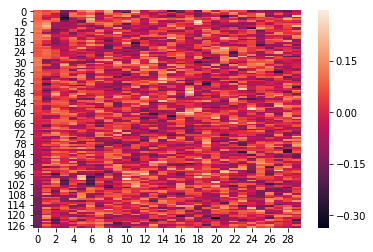

In [56]:
sns.heatmap(pca_output['weights'])

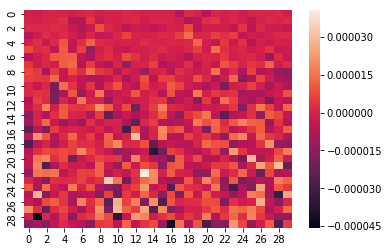

In [54]:
sns.heatmap(pca_ica_output['weights'])

In [55]:
np.dot(pca_ica_output['weights'])

array([-5.84524444e-07,  2.49644866e-07,  1.02972636e-06, -6.31667826e-06,
       -5.53854517e-07,  7.87689412e-06, -6.32291457e-06,  4.51320826e-06,
        7.25636722e-06,  5.75422287e-06,  1.08532153e-06,  1.18187483e-06,
       -7.50478777e-06, -3.80959640e-06, -1.38886157e-05, -1.16747673e-05,
       -2.42887923e-05, -6.29824682e-06, -2.66351728e-05, -6.81105890e-06,
       -4.26965810e-06, -5.57845085e-06, -1.28074288e-05,  9.69900755e-07,
        1.01387281e-05, -6.14667315e-06, -3.29411654e-06,  1.97241357e-05,
       -1.02592616e-06, -1.61356631e-05])

threshold is ignored for simple axial plots


/Users/lukechang/anaconda3/lib/python3.7/site-packages/nilearn-0.5.0-py3.7.egg/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/Users/lukechang/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


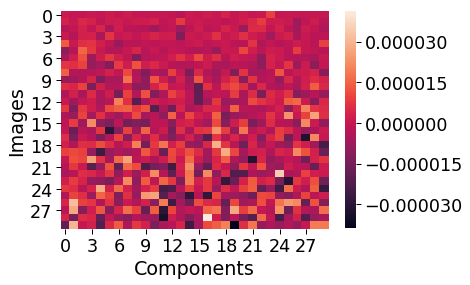

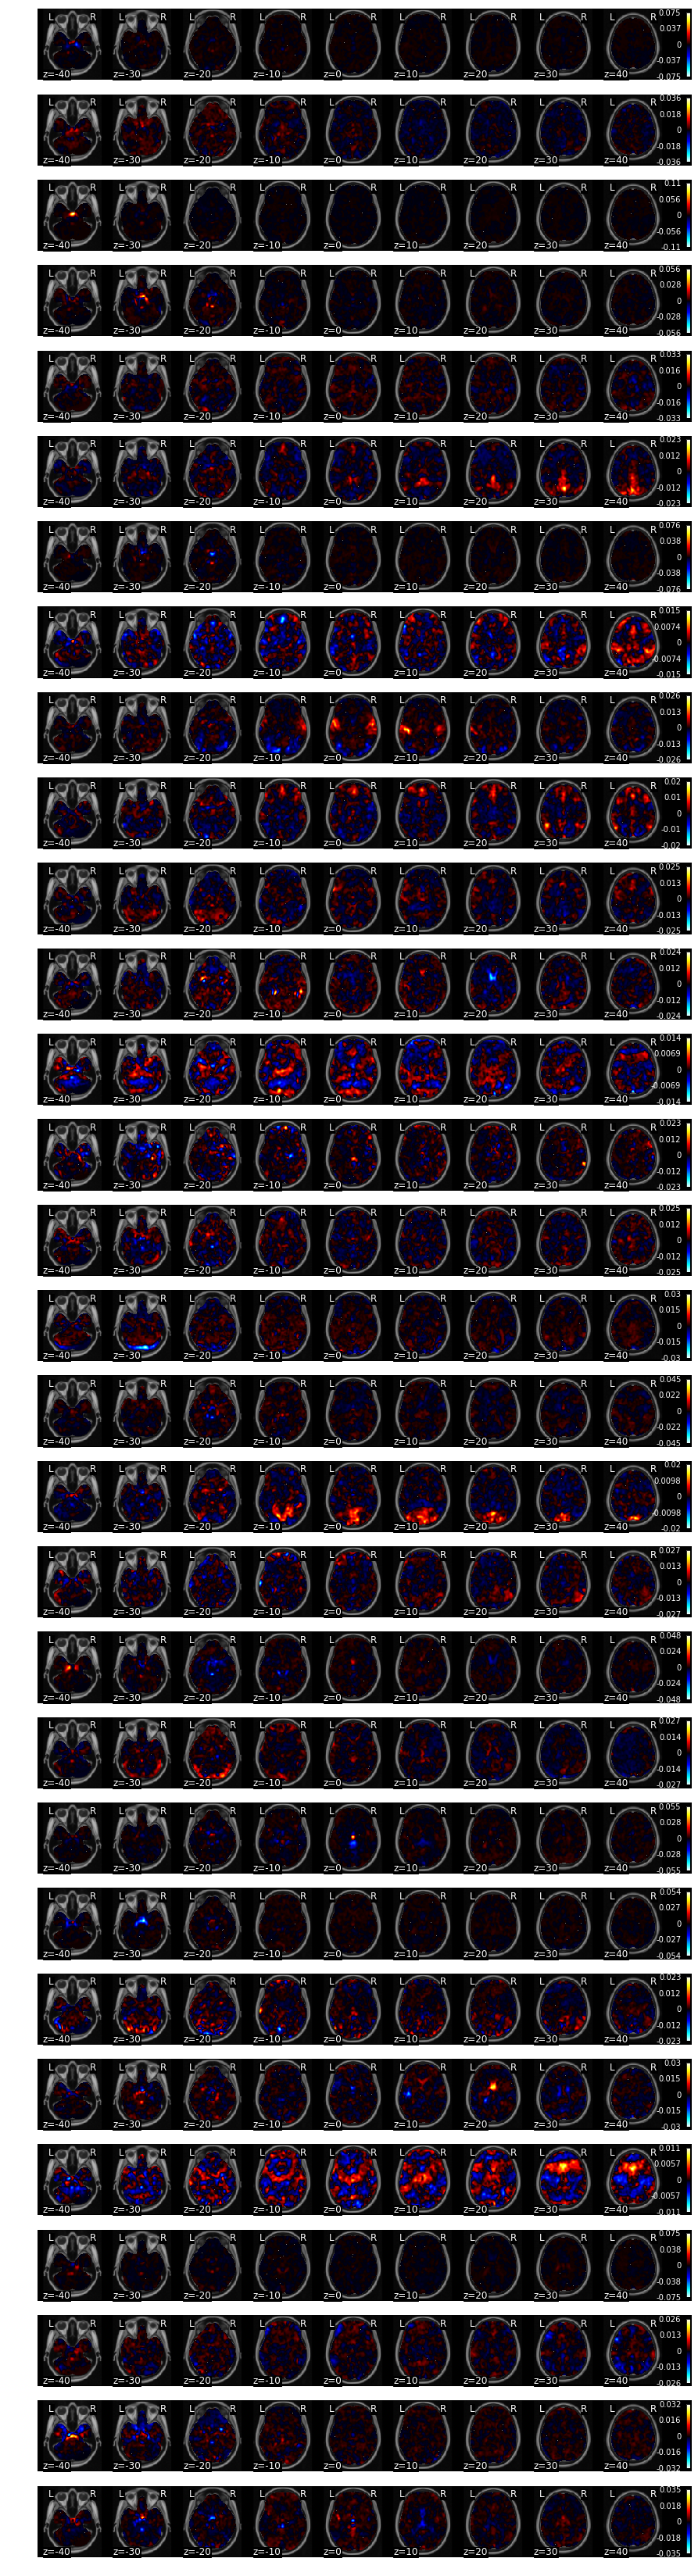

In [42]:
pca_ica_output = pca_output['components'].decompose(algorithm='ica', axis='images')

with sns.plotting_context(context='paper', font_scale=2):
    sns.heatmap(pca_ica_output['weights'])
    plt.ylabel('Images')
    plt.xlabel('Components')

f = pca_ica_output['components'].plot(limit=n_components)

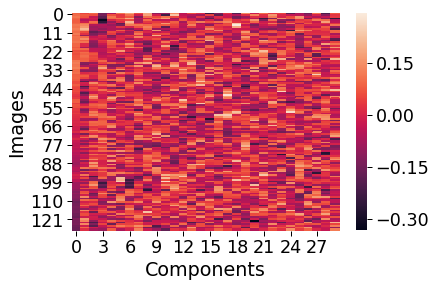

In [21]:
with sns.plotting_context(context='paper', font_scale=2):
    sns.heatmap(pca_output['weights'])
    plt.ylabel('Images')
    plt.xlabel('Components')

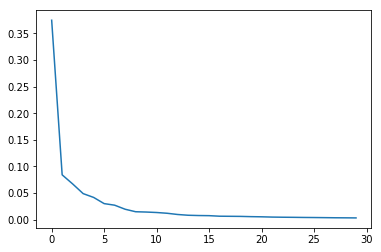

In [36]:
plt.plot(pca_output['decomposition_object'].explained_variance_ratio_)

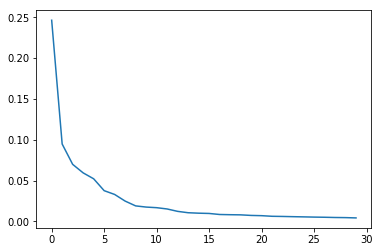

In [33]:
plt.plot(pca_output['decomposition_object'].explained_variance_ratio_)

threshold is ignored for simple axial plots


/Users/lukechang/anaconda3/lib/python3.7/site-packages/nilearn-0.5.0-py3.7.egg/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/Users/lukechang/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


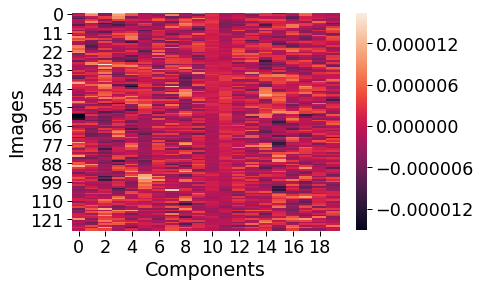

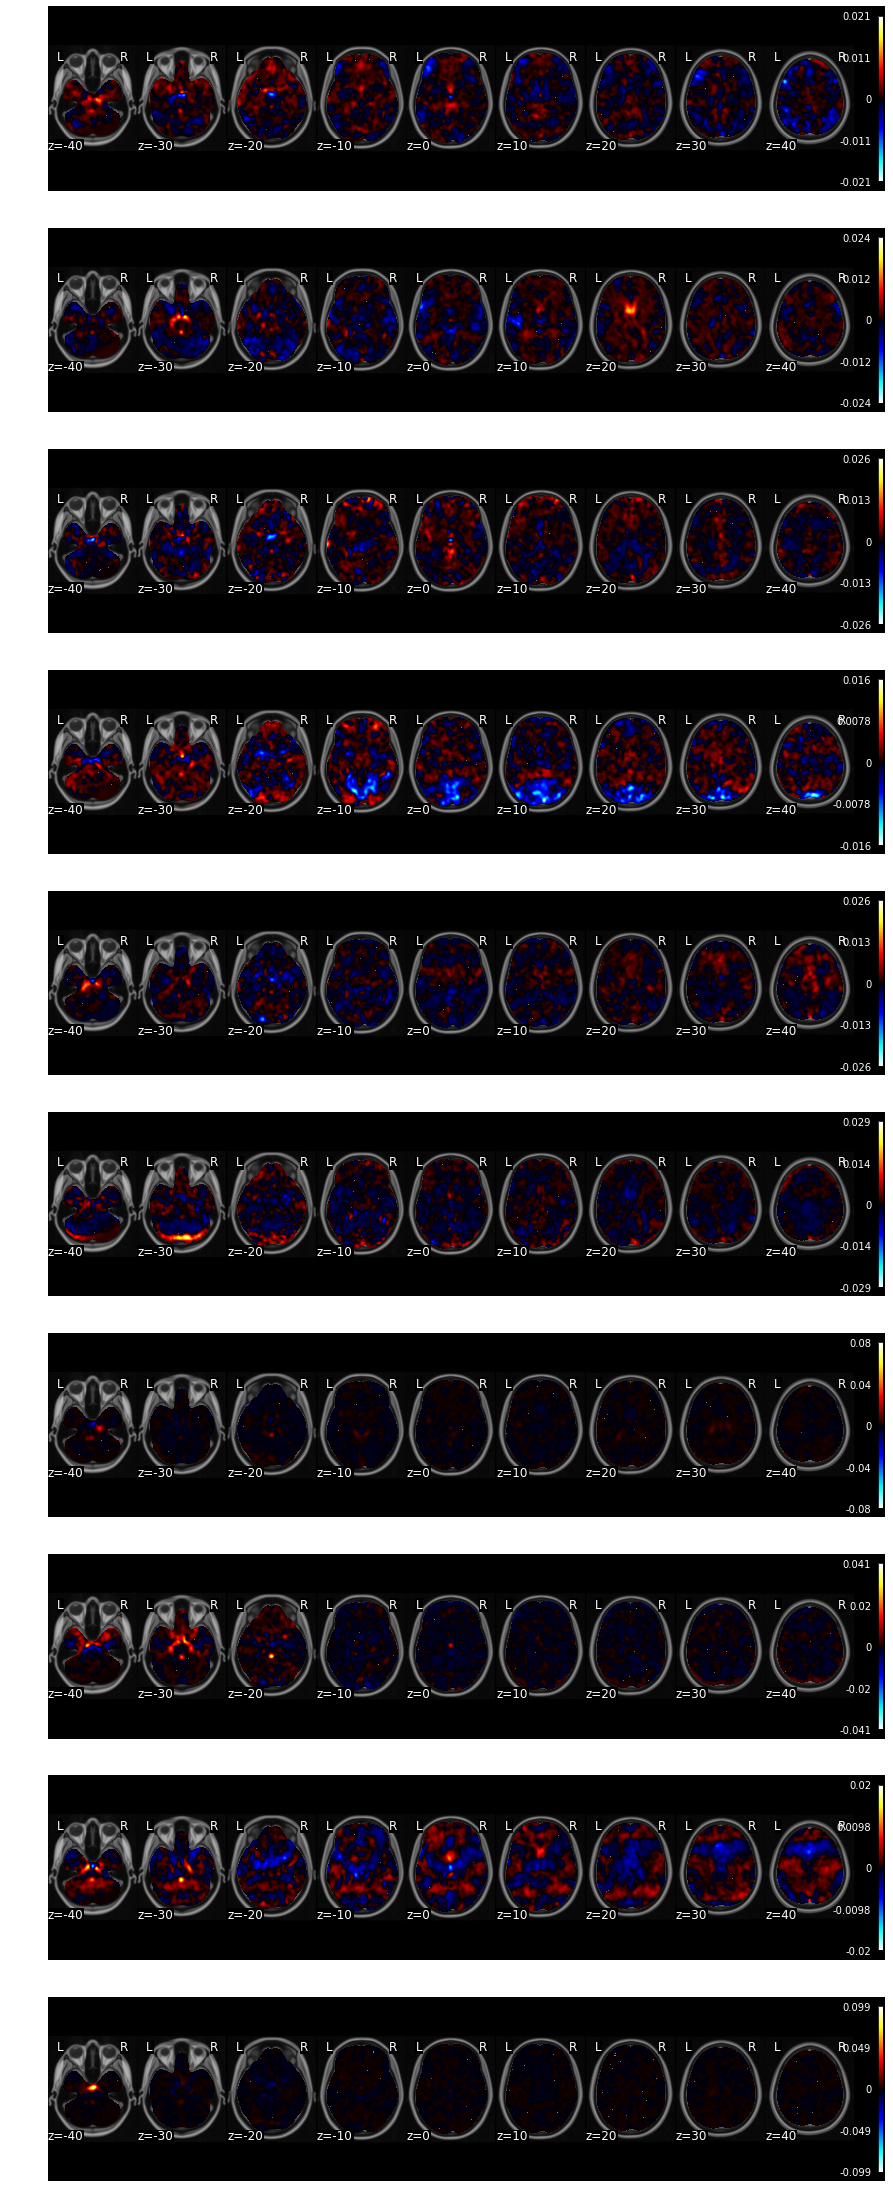

In [28]:
n_components=30

ica_output = data.decompose(algorithm='ica', axis='images', n_components=n_components)

with sns.plotting_context(context='paper', font_scale=2):
    sns.heatmap(ica_output['weights'])
    plt.ylabel('Images')
    plt.xlabel('Components')

f = ica_output['components'].plot(limit=10)

In [34]:
data.decompose?

In [ ]:
n_components = 10

def plot_pca_ica_output(pca_output, ica_output, component):
    '''Generate plots from decompose output'''
    backprojected_weights = np.dot(pca_output['weights'], ica_output['weights'])
    f,a = plt.subplots(nrows=2, figsize = (20,8))
    plot_stat_map(ica_output['components'][component].to_nifti(), 
                  cut_coords=range(-40, 50, 10), display_mode='z',
                  black_bg=True, colorbar=True, draw_cross=False, axes=a[0])
    a[1].plot(backprojected_weights[:, component], linewidth=3)
    a[1].set_xlabel('Time (TRs)', fontsize=18)
    a[1].set_ylabel('Intensity', fontsize=18)
    a[0].set_title(f'Component: {component}', fontsize=20)
    plt.tight_layout()
    
pca_output = smoothed_denoised.decompose(algorithm='ica', axis='images',
                                n_components=n_components)
ica_output = pca_output['components'].decompose(algorithm='ica', axis='images',
                                n_components=n_components)

for i in range(10):
    plot_pca_ica_output(pca_output, ica_output, i)



In [ ]:
r = Brain_Data([ica_stats_output['components'], ica_output['components']]).distance(method='correlation')
r.data = 1-r.data
f = r.plot()